# Estimación de parámetros
_Juliana Vallejo Díez, Paola Andrea Fernández López, María Camila Vásquez Correa_

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Procesos de reversión a la media con tendencia constante.

$$dX_t = \alpha(\mu - X_t)dt + \sigma X_t^\gamma dB_t \qquad t\in[0,T] \qquad X_0 = x$$

* $\alpha>0$ es la tasa de reversión.
* $\mu$ es el nivel medio de reversión.
* $\sigma > 0$ está asociado con la volatilidad.
* $\gamma \in [0, 3_/2]$ determina la sensibilidad de la varianza.

### Simulación

**Parámetros**

In [2]:
X0 = 2
alpha = 0.12
sigma = 0.6
gamma = 0.5
mu = 6
N = 500
dt = 1/6
t = np.arange(0, N)

**Simulación trayectoria**

In [3]:
X = np.zeros(N)
X[0] = X0
for j in range(1,N):
    X[j] = X[j-1] + alpha*(mu - X[j-1])*dt + sigma*X[j-1]**gamma*np.sqrt(dt)*np.random.normal()    

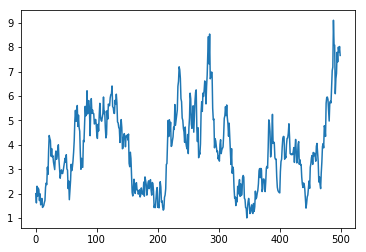

In [4]:
plt.plot(X)
plt.show()

**Estimación**

In [5]:
A = np.sum(np.array([(X[i]*X[i-1])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
B = np.sum(np.array([(X[i-1])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
C = np.sum(np.array([(X[i])/(X[i-1]**(2*gamma)) for i in range(1,N)]))
D = np.sum(np.array([1/(X[i-1]**(2*gamma)) for i in range(1,N)]))
E = np.sum(np.array([(X[i-1]/(X[i-1]**(gamma)))**2 for i in range(1,N)]))

In [6]:
alphae = (E*D - B**2 - A*D + B*C)/((E*D - B**2)*dt)
mue = (A - E*(1 - alphae*dt))/(alphae*B*dt)
sigmae = [((X[i] - X[i-1] - alphae*(mue - X[i-1])*dt)/(X[i-1]**gamma))**2 for i in range(1,N)]
sigmae = np.sqrt((1/(N*dt))*np.sum(sigmae))
print(' alpha:', alphae, '\n', 'sigma:', sigmae, '\n', 'mu:', mue)

 alpha: 0.24905424214007174 
 sigma: 0.6104588383092354 
 mu: 4.082032015333693
